## Two archtype example can be modified to more number if wanted

**Importing important library**

In [40]:
library(quanteda)
library(RColorBrewer)
library(ggplot2)

****Loading the dataset which could be a corpus file containing different type of archtypes****

In [47]:
archtype2 = read.csv("E://examp.csv",header=TRUE, sep=",", quote='\"\"', stringsAsFactors=FALSE)
table(archtype2$v1)


archtype1 archtype2 
     4825       747 

In [48]:
names(archtype2)<-c("type","message")
head(archtype2)

type,message,NA,NA,NA
archtype1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
archtype1,Ok lar... Joking wif u oni...,,,
archtype2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
archtype1,U dun say so early hor... U c already then say...,,,
archtype1,"Nah I don't think he goes to usf, he lives around here though",,,
archtype2,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,


In [49]:
set.seed(2012)
archtype2 <- archtype2[sample(nrow(archtype2)),] #randomly shuffling the dataset

In [50]:
msg.corpus<-corpus(archtype2$message)

docvars(msg.corpus)<-archtype2$type

In [51]:
#subsetting only the archtype2 messages
archtype2.plot<-corpus_subset(msg.corpus,docvars(msg.corpus)=="archtype2")

Warning message:
"'stopwords(language = "SMART")' is deprecated.
Use 'stopwords(source = "smart")' instead.
See help("Deprecated")"Warning message:
"min.freq is deprecated; use min_count instead"

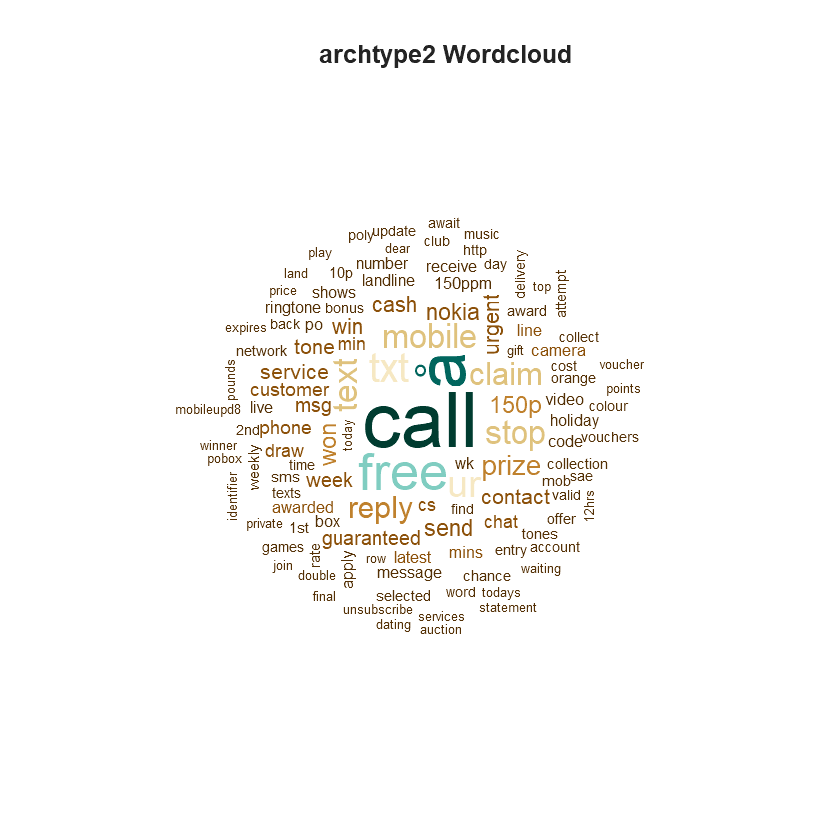

In [52]:
#now creating a document-feature matrix using dfm()
archtype2.plot<-dfm(archtype2.plot, tolower = TRUE, remove_punct = TRUE, remove_twitter = TRUE, remove_numbers = TRUE, remove=stopwords("SMART"))

archtype2.col <- brewer.pal(10, "BrBG")  

textplot_wordcloud(archtype2.plot, min.freq = 16, color = archtype2.col)  
title("archtype2 Wordcloud", col.main = "grey14")

Warning message:
"'stopwords(language = "SMART")' is deprecated.
Use 'stopwords(source = "smart")' instead.
See help("Deprecated")"Warning message:
"min.freqcolorsfixed.asp is deprecated; use min_countcolorfixed_aspect instead"

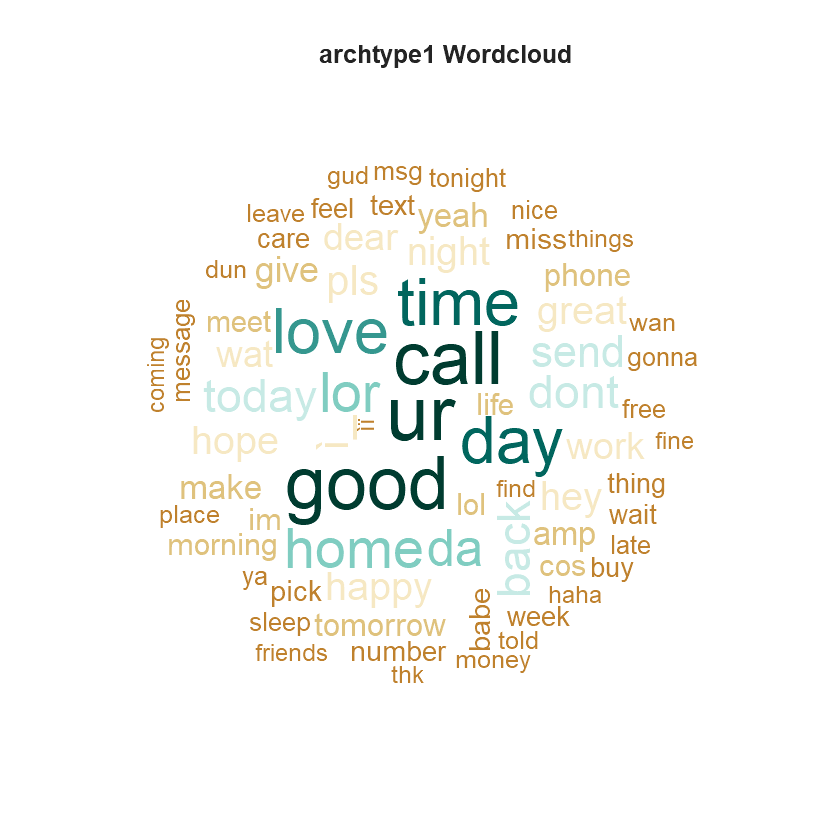

In [53]:
#generating the archtype1 wordcloud
archtype1.plot<-corpus_subset(msg.corpus,docvars(msg.corpus)=="archtype1")
archtype1.plot<-dfm(archtype1.plot,tolower = TRUE, remove_punct = TRUE, remove_twitter = TRUE, remove_numbers = TRUE,remove=c("gt", "lt", stopwords("SMART")))
archtype1.col=brewer.pal(10, "BrBG")  
textplot_wordcloud(archtype1.plot,min.freq=50,colors=archtype1.col,fixed.asp=TRUE)
title("archtype1 Wordcloud",col.main = "grey14")

In [54]:
#separating Train and test data
archtype2.train<-archtype2[1:4458,]
archtype2.test<-archtype2[4458:nrow(archtype2),]

In [55]:
msg.dfm <- dfm(msg.corpus, tolower = TRUE)  #generating document freq matrix
msg.dfm <- dfm_trim(msg.dfm, min_count = 5, min_docfreq = 3)  
msg.dfm <- dfm_weight(msg.dfm) 

head(msg.dfm)

Warning message in dfm_trim.dfm(msg.dfm, min_count = 5, min_docfreq = 3):
"min_count is deprecated, use min_termfreq"

Document-feature matrix of: 6 documents, 1,932 features (99.2% sparse).

In [63]:
#training and testing data of dfm 
msg.dfm.train<-msg.dfm[1:4458,]

msg.dfm.test<-msg.dfm[4458:nrow(archtype1),]

#head(msg.dfm)

In [64]:
nb.classifier <- textmodel_nb(msg.dfm.train,archtype2.train[,1])
summary(nb.classifier)


Call:
textmodel_nb.dfm(x = msg.dfm.train, y = archtype2.train[, 1])

Class Priors:
(showing first 2 elements)
archtype1 archtype2 
      0.5       0.5 

Estimated Feature Scores:
            you   have      1   new      . please   call       i   wait    for
archtype1 0.636 0.4684 0.2412 0.217 0.6859 0.3077 0.1568 0.92432 0.8252 0.4157
archtype2 0.364 0.5316 0.7588 0.783 0.3141 0.6923 0.8432 0.07568 0.1748 0.5843
           hope tonight     too    bad     as   well     but   rock  night
archtype1 0.857  0.8697 0.95906 0.7658 0.5788 0.8306 0.93883 0.7103 0.8322
archtype2 0.143  0.1303 0.04094 0.2342 0.4212 0.1694 0.06117 0.2897 0.1678
          anyway  going      a    now   good  speak     to  soon  today     is
archtype1 0.8512 0.9256 0.4268 0.2928 0.7993 0.3411 0.3802 0.762 0.6009 0.5407
archtype2 0.1488 0.0744 0.5732 0.7072 0.2007 0.6589 0.6198 0.238 0.3991 0.4593
          accept
archtype1 0.7315
archtype2 0.2685

In [65]:
pred<-predict(nb.classifier,msg.dfm.test)

#generating a confusion matrix

# use pred$nb.predicted to extract the class labels
tran <- table(predicted=pred,actual=archtype2.test[,1])
tran

           actual
predicted   archtype1 archtype2
  archtype1       938         3
  archtype2        24       150

In [59]:
#acccuracy of the classifier on Test data
mean(pred==archtype2.test[,1])*100

[1] 97.57848

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



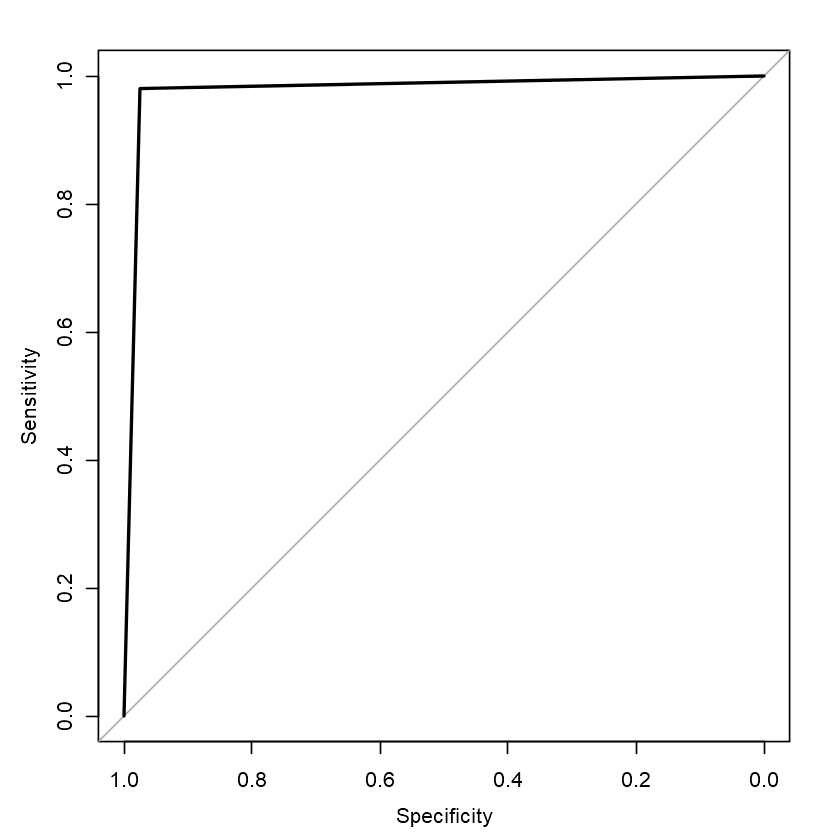

In [62]:
#accuracy of 97% on test set
library(pROC)
prednum<-ifelse(pred=="archtype2",1,2)

auc<-roc(as.factor(archtype2.test[,1]),prednum)
plot(auc)